Importing Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Loading Dataset

In [5]:
news_dataset = pd.read_csv('train.csv')

Data Pre-Processing

In [6]:
news_dataset.shape

(20800, 5)

In [7]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [10]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
11327  11327  Where to Be Single in New York - The New York ...   
6457    6457  Congolese Militia Beheads Dozens of Police Off...   
16667  16667  Hillary Admits In Leaked Email That Clinton Do...   
13719  13719   UK becomes world’s leading exporter of arseholes   
11154  11154  President Trump Takes Calls with World Leaders...   
...      ...                                                ...   
2969    2969  California Today: How Badly Do You Want That N...   
13474  13474  Opposing Views on What to Do About the Data We...   
11654  11654                                                      
19746  19746  Rudolph Giuliani Lashes Out at Black Lives Mat...   
11391  11391  Within Hours Of Donald Trump Being President, ...   

                   author                                               text  
11327          Kim Velsey  There may be no such thing as an ideal neighbo...  
6457          Steve Wembi  KINSHASA, 

In [11]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
news_dataset['text'] = news_dataset['text'].apply(stemming)
print(news_dataset['text'])

11327    may thing ideal neighborhood singl peopl even ...
6457     kinshasa democrat republ congo member militia ...
16667    post eddi email democrat presidenti candid hil...
13719    monday octob jack marshal uk becom world lead ...
11154    saturday presid trump engag seri phone call fi...
                               ...                        
2969     good morn tri someth new week california today...
13474    data peoplehow make economi work youbi andrea ...
11654    refer gentleman abil advocaci need tough team ...
19746    rudolph w giuliani former mayor new york lash ...
11391    donald trump offici becom presid januari withi...
Name: text, Length: 500, dtype: object


In [13]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values
print(X)
print(Y)

['may thing ideal neighborhood singl peopl even age date app websit neighborhood continu play huge role peopl choos date whether one strike convers coffe shop talli proxim point potenti love interest geographi matter larg way small fret hourlong postdat commut allow drink turn dinner instanc bar fill friend may bestow confid initi convers stranger turn may lead confid approach stranger bar night citi divers new york neighborhood date happen natur difficult find statist may like pickup line mislead dorothi castillo found prospect move manhattan entic number reason least assum citi date scene would far superior suburban rockland counti n spent life thought go golden ticket go date time recal ms castillo teacher bought studio apart washington height two half year ago truli honestli know na hope meet someon groceri store walk street said instead meet peopl person near imposs ad consid social person though oppos onlin date felt place washington height found foray midtown lower east side bar

Feature Engineering (Vectorizing)

In [14]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

Splitting the dataset to training & test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


WITH PACKAGE IMPLEMENTATION

In [16]:
logistic_model = LogisticRegression()

In [17]:
logistic_model.fit(X_train, Y_train)

LogisticRegression()

EVALUATION

1) Classification Report

In [19]:
from sklearn.metrics import classification_report
logistic_pred = logistic_model.predict(X_test)
print(classification_report(Y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        49
           1       0.82      0.90      0.86        51

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



2) Confusion Matrix

Confusion Matrix:
 [[39 10]
 [ 5 46]]


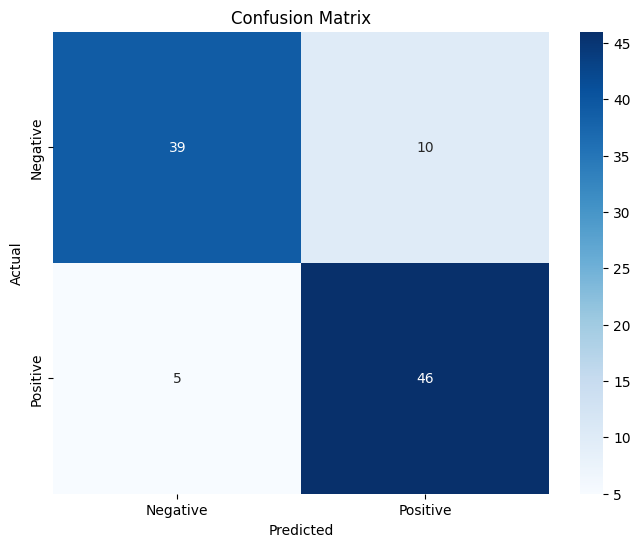

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,logistic_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

MANUAL TESTING for WITH PACKAGE IMPLEMENTATION

In [21]:
def logistic_prediction_testing():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    print(X)
    
    # Make the prediction
    prediction = logistic_model.predict(X)
    if (prediction==0):
     print('The news is Real ',prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
logistic_prediction_testing()

[[0. 0. 0. ... 0. 0. 0.]]
The news is Real  [0]


WITHOUT PYTHON PACKAGE IMPLEMENTATION

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
#converting sparse matrix (csr_matrix) to array
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
print(X1_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class logistic_regression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # Convert probabilities to binary predictions
        binary_predictions = (y_pred >= 0.5).astype(int)
        return binary_predictions

EVALUATION

In [28]:
log_r = logistic_regression(lr=0.01)
log_r.fit(X1_train,y1_train)

1) Classification Report

In [30]:
logistic_pred = log_r.predict(X1_test)
print(classification_report(y1_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.43      1.00      0.60        43

    accuracy                           0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



C:\Users\CW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CW\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:151

2) Confusion Matrix

Confusion Matrix:
 [[ 0 57]
 [ 0 43]]


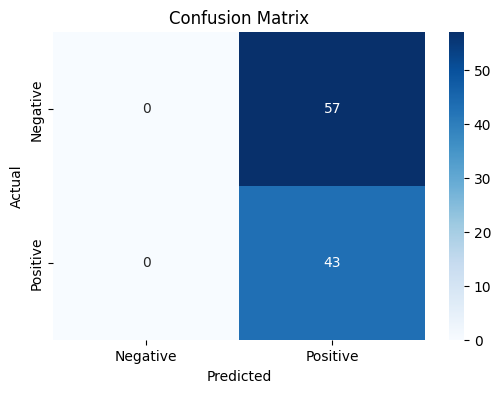

In [29]:
cm = confusion_matrix(y1_test,logistic_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

MANUAL TESTING for WITHOUT PACKAGE IMPLEMENTATION

In [27]:
def manual_logistic_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    print(X)
    
    # Make the prediction
    prediction = log_r.predict(X)
    if (prediction==0):
     print('The news is Real ',prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_logistic_prediction()

[[0. 0. 0. ... 0. 0. 0.]]
The news is Fake [1]
